# Crime

## Read Data

In [2]:
import pandas as pd
import numpy as np
import math as ma

crime = pd.read_csv('crime.csv',delimiter = ',',encoding = 'ANSI')

c:\users\sakura\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. Data Description

In [44]:
crime.describe(percentiles = [])

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
50%        42.325552     -71.077493  
max        42.395042      -1.000000

## Mode

In [3]:
print("-------------------------Mode---------------------")
crime.mode()

-------------------------Mode---------------------


INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0      I162030584        3006.0  Motor Vehicle Accident Response   
1             NaN           NaN                              NaN   

             OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0  SICK/INJURED/MEDICAL - PERSON       B2                       Y   
1                            NaN      NaN            NaN      NaN   

      OCCURRED_ON_DATE    YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2016-08-01 00:00:00  2017.0    8.0      Friday  17.0  Part Three   
1  2017-06-01 00:00:00     NaN    NaN         NaN   NaN         NaN   

          STREET        Lat       Long                  Location  
0  WASHINGTON ST  42.348624 -71.082776  (0.00000000, 0.00000000)  
1            NaN        NaN        NaN                       NaN

## Variance

In [4]:
print("------------------------Variance--------------------")
crime.var()

------------------------Variance--------------------


OFFENSE_CODE    1.404201e+06
YEAR            1.019645e+00
MONTH           1.058841e+01
HOUR            3.959825e+01
Lat             4.724085e+00
Long            1.236107e+01
dtype: float64

## Skewness

In [5]:
print("---------------------------Skewness-------------------")
crime.skew()

---------------------------Skewness-------------------


OFFENSE_CODE    -0.410645
YEAR            -0.083805
MONTH           -0.119591
HOUR            -0.482938
Lat            -19.827352
Long            19.831624
dtype: float64

## Kurtosis

In [6]:
print("-----------------------------Kurtosis--------------------")
crime.kurtosis()

-----------------------------Kurtosis--------------------


OFFENSE_CODE     -1.415226
YEAR             -1.090411
MONTH            -1.035742
HOUR             -0.600736
Lat             391.211516
Long            391.324226
dtype: float64

## 2. Diagram

## Box Plot

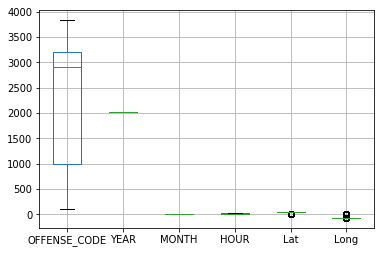

In [4]:
crime.plot(kind = 'box',grid = True)

## Histogram

In [3]:
crime.plot(kind = 'hist',grid = True)

## 3. Distribusi yang digunakan

 Distribusi yang digunakan adalah distribusi hipergeometrik karena untuk kasus ini pengambilan data tidak dikembalikan karena akan membuat data kacau

## 4. Jawaban Pertanyaan

## Jika terdapat 1000 kejahatan baru tentukan ekspektasi kejahatan yang:

In [50]:
newCrime1 = 1000

HomicideCount = crime['INCIDENT_NUMBER'][crime['OFFENSE_CODE_GROUP'] == 'Homicide'].count()
HomicideShootingCount = crime['SHOOTING'][crime['OFFENSE_CODE_GROUP'] == 'Homicide'].count()
IncidentTimeCount = crime['INCIDENT_NUMBER'][(crime['DAY_OF_WEEK'] == 'Saturday') & (crime['HOUR'] == 20)].count()

expect1 = int(ma.floor(HomicideCount/len(crime)*newCrime1))
expect2 = int(ma.floor((HomicideCount-HomicideShootingCount)/len(crime)*newCrime1))
expect3 = int(ma.floor(IncidentTimeCount/len(crime)*newCrime1))

print("Ekspektasi kejahatan Homicide =",expect1)
print("Ekspektasi kejahatan Homicide tanpa Shooting =",expect2)
print("Ekspektasi kejahatan di hari Sabtu pukul 20.00 =",expect3)

Ekspektasi kejahatan Homicide = 0
Ekspektasi kejahatan Homicide tanpa Shooting = 0
Ekspektasi kejahatan di hari Sabtu pukul 20.00 = 6


## Jika terdapat 2000 kejahatan baru tentukan ekspektasi kejahatan yang:

In [53]:
newCrime2 = 2000

StreetIncidentCount = crime['INCIDENT_NUMBER'][(crime['STREET'] == 'PRESCOTT ST') | (crime['STREET'] == 'GENEVA AVE')].count()
PoliceDistrictCount = crime['INCIDENT_NUMBER'][(crime['DISTRICT'] == 'E18') & (crime['REPORTING_AREA'] == 495)].count()
NotHolidayCount = crime['INCIDENT_NUMBER'][(crime['DAY_OF_WEEK'] != 'Saturday') & (crime['DAY_OF_WEEK'] != 'Sunday')].count()

expect4 = int(ma.floor(HomicideCount/len(crime)*newCrime2))
expect5 = int(ma.floor(PoliceDistrictCount/len(crime)*newCrime2))
expect6 = int(ma.floor(NotHolidayCount/len(crime)*newCrime2))

print("Ekspektasi kejahatan di Geneva Ave atau Prescott Street =",expect4)
print("Ekspektasi kejahatan di distrik E18 dan dilaporkan di kantor polisi 495 =",expect5)
print("Ekspektasi kejahatan tidak terjadi di hari libur =",expect6)

Ekspektasi kejahatan di Geneva Ave atau Prescott Street = 1
Ekspektasi kejahatan di distrik E18 dan dilaporkan di kantor polisi 495 = 0
Ekspektasi kejahatan tidak terjadi di hari libur = 1467
